In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

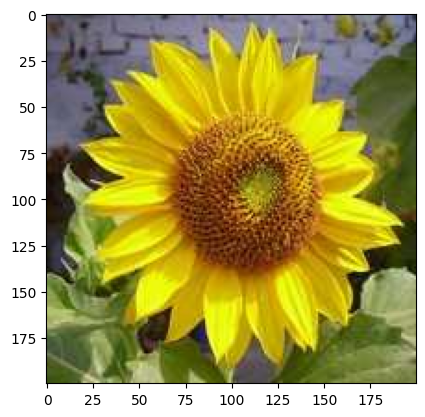

In [3]:
plt.imshow(image)

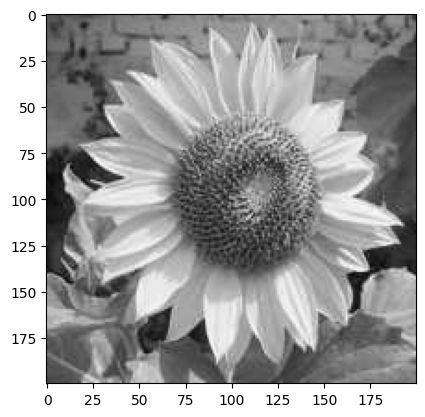

In [4]:
grey_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img, cmap='gray')

# ***Gaussian Noise and Solve it***

In [5]:
mean = 0
variance = 500
sigma = variance ** 0.5
gaussian_noise = np.random.normal(mean, sigma, grey_img.shape)

In [6]:
noisy_image = grey_img + gaussian_noise

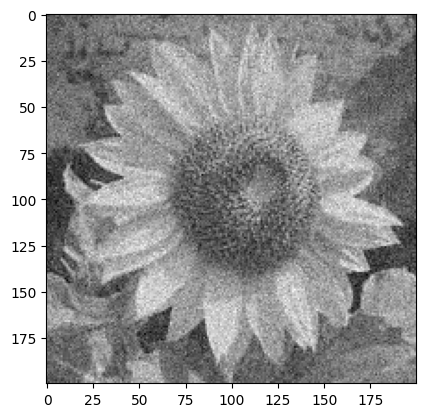

In [7]:
plt.imshow(noisy_image, cmap ='grey')

In [8]:
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

In [9]:
m, n = grey_img.shape
img_new = np.zeros([m, n])
final_img = grey_img.copy()

In [10]:
for i in range(1, m-1):
    for j in range(1, n-1):
        final_img[i,j] = noisy_image[i-1, j-1]*mask[0,0] + noisy_image[i-1, j]*mask[0,1] + noisy_image[i-1, j+1]*mask[0,2]+ noisy_image[i,j-1]*mask[1,0] + noisy_image[i,j]*mask[1,1]
        + noisy_image[i,j+1]*mask[1,2] + noisy_image[i+1,j-1]*mask[2,0] + noisy_image[i+1,j]*mask[2,1] + noisy_image[i+1,j+1]*mask[2,2]

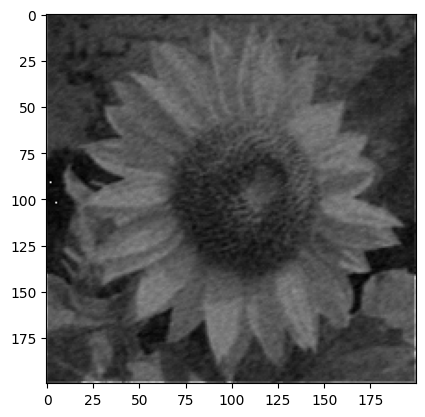

In [11]:
plt.imshow(final_img, cmap='gray')

# ***ADD SALT AND PEPPER NOISE AND REMOVE IT***

In [12]:
import random
number_of_pixel = random.randint(300,1000)

In [13]:
for i in range(number_of_pixel):
    y_coord = random.randint(0, grey_img.shape[0]-1)
    x_coord = random.randint(0, grey_img.shape[1]-1)

    noisy_image[y_coord][x_coord] = 255

In [14]:
number_of_pixel = random.randint(300,1000)

In [15]:
for i in range(number_of_pixel):
    y_coord = random.randint(0, grey_img.shape[0]-1)
    x_coord = random.randint(0, grey_img.shape[1]-1)

    noisy_image[y_coord][x_coord] = 0

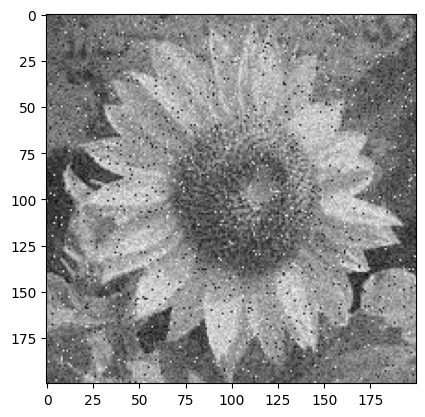

In [16]:
plt.imshow(noisy_image, cmap='grey')

In [17]:
m, n = noisy_image.shape

In [18]:
img_new1 = np.zeros([m, n])

In [19]:
for i in range(0, m-1):
  for j in range(0, n-1):
        temp = [noisy_image[i-1, j-1],
               noisy_image[i-1, j],
               noisy_image[i-1, j + 1],
               noisy_image[i, j-1],
               noisy_image[i, j],
               noisy_image[i, j + 1],
               noisy_image[i + 1, j-1],
               noisy_image[i + 1, j],
               noisy_image[i + 1, j + 1]]

        temp = sorted(temp)
        img_new1[i, j]= temp[4]

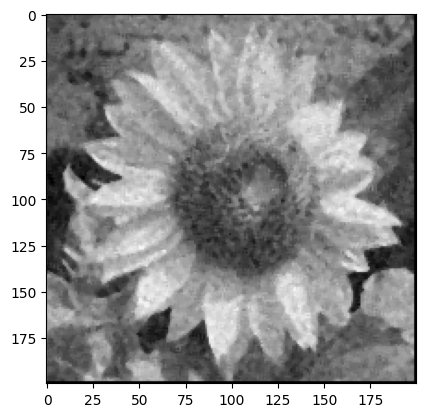

In [20]:
plt.imshow(img_new1, cmap='grey')